In [1]:
from ucimlrepo import fetch_ucirepo
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from model import Model

np.random.seed(0)

## Generated dataset


In [2]:
n_samples = 1000 
n_features = 10  
X_train = np.random.randn(n_samples, n_features)
y_train = np.random.choice([-1, 1], size=n_samples)

Optimal n:
 [0.         0.10355344 0.         0.         0.         0.
 0.         0.01236105 0.05611033 0.        ]
---------------------------------------------------------------------------
Optimal p:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
---------------------------------------------------------------------------
Optimal w:
 [0.         0.10355344 0.         0.         0.         0.
 0.         0.01236105 0.05611033 0.        ]
---------------------------------------------------------------------------
Optimal bias:
 -0.012752770487375331
---------------------------------------------------------------------------
Minimum logistic loss:
 69.14042491125633


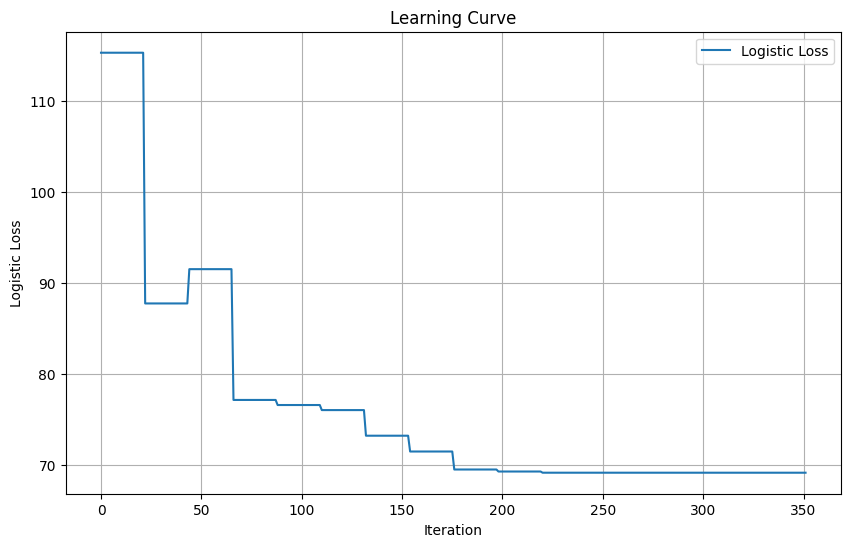

In [3]:
model = Model()
model.fit(X_train, y_train)
model.plot_loss_history()

## UCI Dataset

In [4]:
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
X = breast_cancer_wisconsin_diagnostic.data.features.to_numpy()

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
y = breast_cancer_wisconsin_diagnostic.data.targets.to_numpy().flatten()
label_mapping = {'M': -1, 'B': 1}
y = np.vectorize(label_mapping.get)(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Optimal n:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.10419083 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
---------------------------------------------------------------------------
Optimal p:
 [0.         0.         0.         0.         0.         0.
 0.         0.90823244 0.         0.         0.73860145 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         2.72639375 1.06873928 0.         0.
 0.3178015  0.         0.31317873 0.58570635 0.32763799 0.        ]
---------------------------------------------------------------------------
Optimal w:
 [ 0.          0.          0.          0.          0.          0.
  0.         -0.90823244  0.          0.         -0.73860145  0.
  0.          0.          0.          0.          0.          0.
  0.     

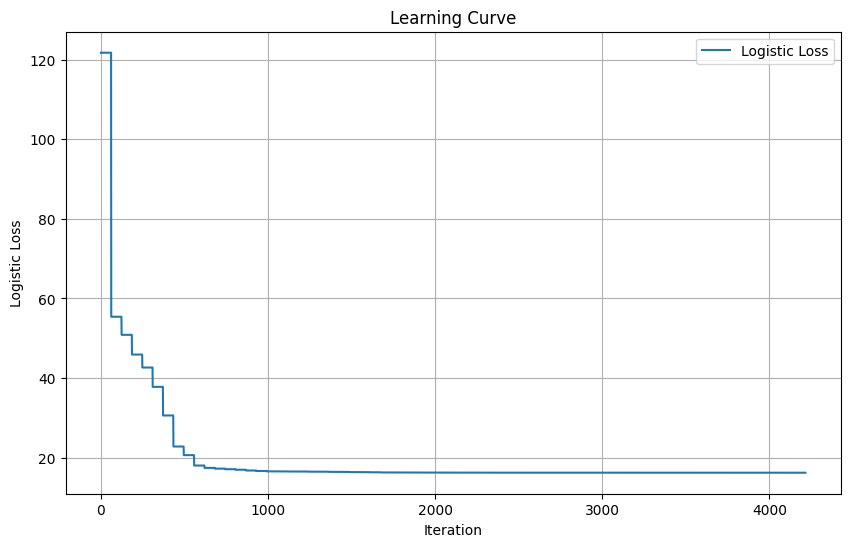

Accuracy score: 0.9649122807017544


In [5]:
model = Model()
model.fit(X_train, y_train)
model.plot_loss_history()
y_pred = model.predict(X_test)
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
